In [1]:
!pip install pandas
!pip install dowhy
!pip install pgmpy
!pip install pygraphviz
!pip install numpy
!pip install graphviz
!pip install numpy
!pip install networkx
!pip install causal-learn

In [3]:
import pandas as pd
import os
path = os.getcwd()+"/local/uni/inference/Task2/"

print()
file_path = path + './social_media_engagement_data.csv'
df = pd.read_csv(file_path, header=0)

# manually replaced the data
### Platform ###
# LinkedIn = 1
# Instagram = 2
# Twitter = 3
# LinkedIn = 4

### Post Type ###
# Video = 1
# Image = 2
# Link = 3

print(df)

 


     Platform  Post Type  Likes  Comments  Shares  Impressions  Reach
0           1          1    415        77      85         2619   1842
1           2          1    908       125      85         1223   3884
2           2          1    412       419      58         2165    849
3           3          2    667       153      29         7191   3519
4           4          3    659       215      34         3312   2032
..        ...        ...    ...       ...     ...          ...    ...
995         4          3    391       248      97         7759   2197
996         4          3    350        43     133         2760   1076
997         1          3      4       392      68         7781   4938
998         2          1    452       399     179         8689   3826
999         1          2    987        39     163         2061   4305

[1000 rows x 7 columns]


[[   1    1  415 ...   85 2619 1842]
 [   2    1  908 ...   85 1223 3884]
 [   2    1  412 ...   58 2165  849]
 ...
 [   1    3    4 ...   68 7781 4938]
 [   2    1  452 ...  179 8689 3826]
 [   1    2  987 ...  163 2061 4305]]


  0%|          | 0/7 [00:00<?, ?it/s]

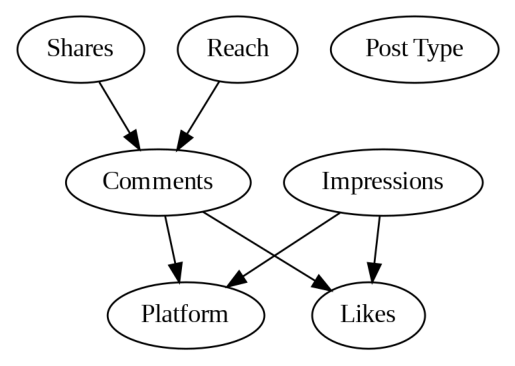

In [13]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.cit import kci
labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df.to_numpy()

print(data)

cg = pc(data, 0.2, kci, kernelZ='Polynomial', approx=False, est_width='median')
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

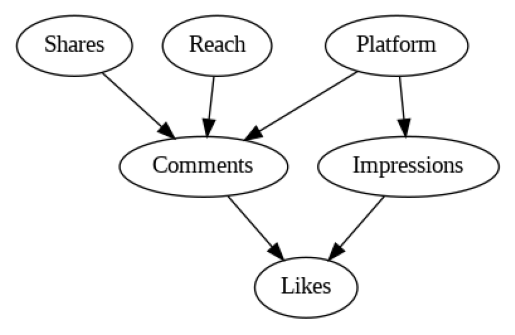

In [5]:
# taking the data driven graph and appling expert knowledge the following is constructed:

import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

model = BayesianNetwork([('Shares', 'Comments'), ('Reach', 'Comments'), ('Platform', 'Comments'), ('Comments', 'Likes'), ('Platform', 'Impressions'), ('Impressions', 'Likes')])
viz = model.to_graphviz()

viz.draw(path + "./domain_knowledge_graph.png", prog="dot")
img = plt.imread(path + "./domain_knowledge_graph.png")
plt.imshow(img)
plt.axis('off')
plt.show()